### Step 1: Loading the data files

First we load the csv files into dataframes. We will use the pandas library (https://pandas.pydata.org/). After loading the csv files we convert the values in the "tijdslot" column to proper timestamps that we can plot easily. We will also create a list of unique "koenummers" that we can use in other code snippets. 

In [1]:
import numpy as np
import pandas as pd
import time

#load dataframe from csv
standingtime = pd.read_csv("../data/standingtimedata.csv")
lyingtime = pd.read_csv("../data/lyingtimedata.csv")
walkingtime = pd.read_csv("../data/walkingtimedata.csv")
neckactivity = pd.read_csv("../data/neckactivitydata.csv")
legactivity = pd.read_csv("../data/legactivitydata.csv")
koenummers = legactivity["koenummer"].unique()

#convert "tijdslot" to timestamps
standingtime["tijdslot"] = pd.to_datetime(standingtime["tijdslot"], infer_datetime_format=True)
lyingtime["tijdslot"] = pd.to_datetime(lyingtime["tijdslot"], infer_datetime_format=True)
walkingtime["tijdslot"] = pd.to_datetime(walkingtime["tijdslot"], infer_datetime_format=True)
neckactivity["tijdslot"] = pd.to_datetime(neckactivity["tijdslot"], infer_datetime_format=True)
legactivity["tijdslot"] = pd.to_datetime(legactivity["tijdslot"], infer_datetime_format=True)

#print standingtime to test if we loaded the data correctly
print("Column types for standingtime dataframe:")
display(standingtime.dtypes)

Column types for standingtime dataframe:


respondernr             int64
koenummer               int64
tijdslot       datetime64[ns]
statijd                 int64
lifenummer             object
dtype: object

In [2]:
koenummers

array([ 27,  18,   7,  82, 101, 118,  30, 105,  38,  33,  25, 123,  91,
        10,  78, 115,  98,   5, 119,  49,  57,   9,  45,   2,   6, 126,
        20,  89,  22,  96,  59,  88,  47,  43, 330,  69,  58, 130,  41,
        65,  87,  81,  19,  73, 338,  92,  79,   3,  13, 339,  32,  48,
       102,  17, 335,  68,  15, 336,  97,  70, 106, 100, 127, 108,  76,
        67,  16,  71,  44, 132, 337, 109,  37,  31, 120, 113,  12,  53,
        62, 111,  50, 114, 340,  52,  64,  86, 117,  83,  72,  51,  66,
        80,   4,  90,  40,  11,  74,  14,  28,  36, 122,  26,  39,  84,
       104,  29,  35,  46,  61,  95,  99,   1,  21,  24,  93, 128, 129,
        55,  94, 112,  54,  85, 124, 121,  34,  56])

### Step 2: Plot and aggregate data for one specific cow

We have the data properly loaded now. Time to have closer look at the content. 
For this purpose, let"s create a subset for a specific cow (NL 879042275) for three days, which we can plot...

In [3]:
subset = legactivity.loc[legactivity["lifenummer"] == "NL 879042275"]
subset = subset.loc[subset["tijdslot"]>"2021-05-01 00:00:00"]
subset = subset.loc[subset["tijdslot"]<"2021-05-04 00:00:00"]
subset

,respondernr,koenummer,tijdslot,legactivity,lifenummer
318630,984000713787836,27,2021-05-01 00:14:00,71,NL 879042275
318754,984000713787836,27,2021-05-01 00:29:00,47,NL 879042275
318878,984000713787836,27,2021-05-01 00:44:00,55,NL 879042275
319002,984000713787836,27,2021-05-01 00:59:00,41,NL 879042275
319126,984000713787836,27,2021-05-01 01:14:00,3,NL 879042275
...,...,...,...,...,...
353722,984000713787836,27,2021-05-03 22:59:00,11,NL 879042275
353846,984000713787836,27,2021-05-03 23:14:00,3,NL 879042275
353970,984000713787836,27,2021-05-03 23:29:00,8,NL 879042275
354094,984000713787836,27,2021-05-03 23:44:00,61,NL 879042275


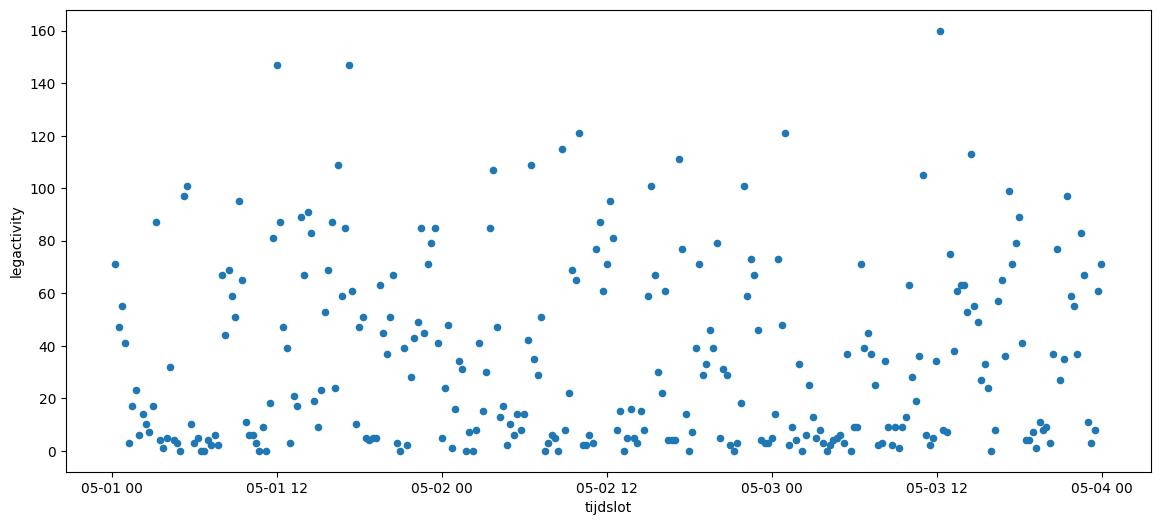

In [4]:
# let"s plot the leg activity data for this subset
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plot = subset.plot(x ="tijdslot", y="legactivity", kind = "scatter", figsize=(14,6))

The data points contain activity counts within 15 minute intervals. With this detailed view it is hard to see a clear pattern or trend. Let"s take some distance, and aggregate over 4 hours instead. Be aware, the Python code below is rather naive. It assumes every other row follows 15 minutes after the previous one. 

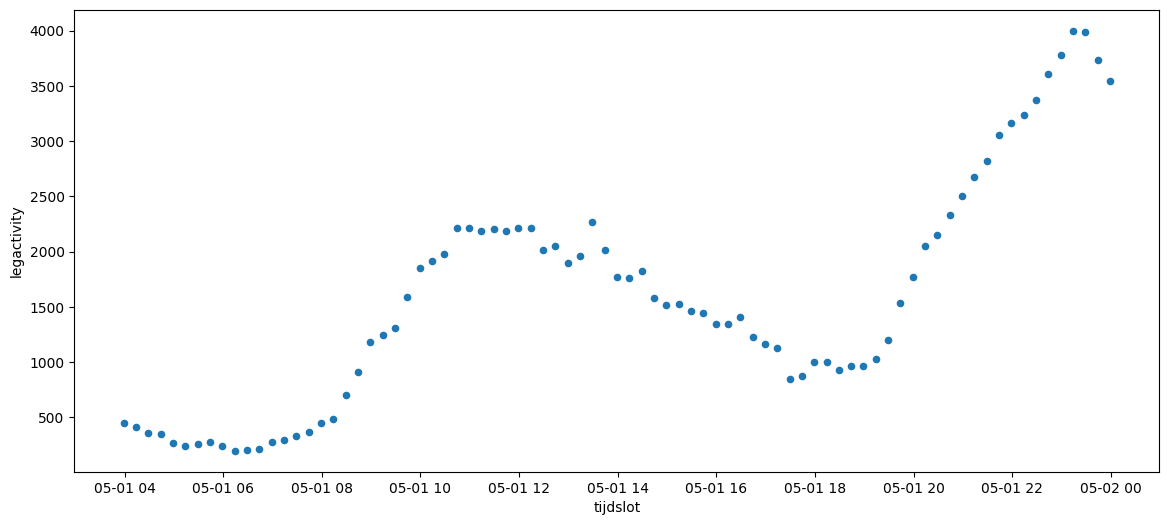

In [5]:
subset = legactivity.loc[legactivity["lifenummer"] == "NL 563544357"]
subset = subset.loc[subset["tijdslot"]>"2021-05-01 00:00:00"]
subset = subset.loc[subset["tijdslot"]<"2021-05-02 00:00:00"]
subset.legactivity = subset.rolling(16).legactivity.sum() # 4 hours (16 x 15 minutes)
plot = subset.plot(x ="tijdslot", y="legactivity", kind = "scatter", figsize=(14,6))

In the plot above you can see how when you use a rolling window of 4 hours, a pattern emmerges. You can experiment with different aggregation windows. 

### Step 3: Find estrus cases with activity data

Let"s now check for 8 hours aggregates and for a a whole month. 

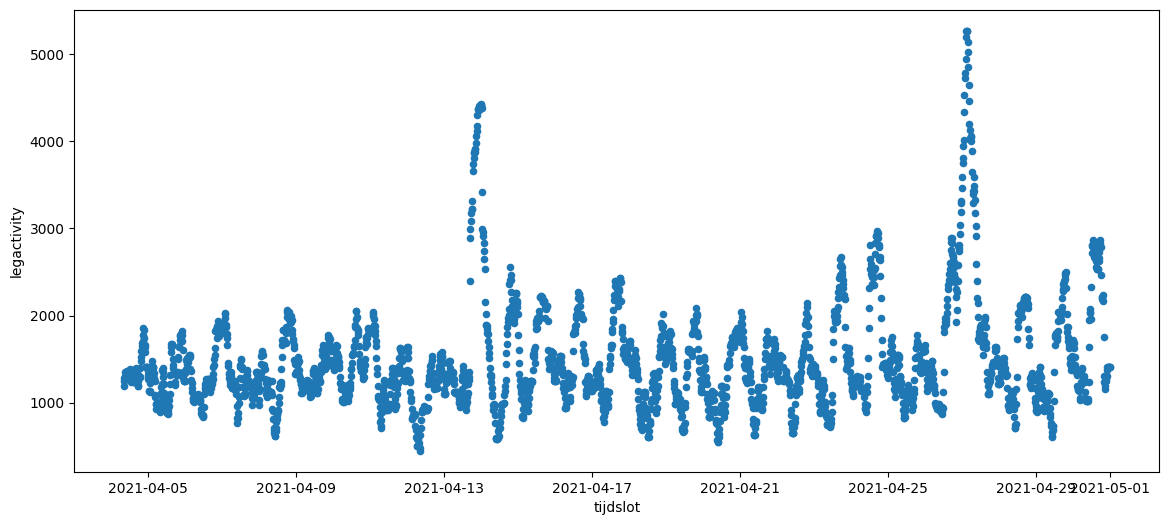

In [6]:
subset = legactivity.loc[legactivity["koenummer"] == 51]
subset = subset.loc[subset["tijdslot"]>"2021-04-01 00:00:00"]
subset = subset.loc[subset["tijdslot"]<"2021-05-01 00:00:00"]
subset.legactivity = subset.rolling(8 * 4).legactivity.sum() # 8 hours (8 * 4 x 15 minutes)
plot = subset.plot(x ="tijdslot", y="legactivity", kind = "scatter", figsize=(14,6))

When peaks of activity emerge in aggregated data (here with a rolling window of 8 hours) that are about 3 weeks apart, the cow is most likely ovulating at theses peaks of activity. You can also see that there are smaller peaks that align with day and night cycles.

You can filter out the day and night cycle, by taking a sliding window of 24 hours... but be aware that ovulation takes about 8 hours and would be discovered too late when you aggregate over 24 hours. The farmer would miss the opportunity to insemimate the cow.

You can take advantage of the find_peaks function in the scipy library to automatically find peaks that indicate estrus. (https://docs.scipy.org/doc//scipy/reference/generated/scipy.signal.find_peaks.html) 

In [7]:
from scipy.signal import find_peaks
for koenummer in koenummers:
    subset = legactivity.loc[legactivity["koenummer"] == koenummer]
    subset = subset.loc[subset["tijdslot"]>"2021-03-01 00:00:00"]
    subset = subset.loc[subset["tijdslot"]<"2021-06-01 00:00:00"]
    subset.legactivity = subset.rolling(8 * 4).legactivity.sum() # 8 hours (8 * 4 x 15 minutes)
    max = np.nanmax(subset.legactivity)
    median = np.nanmedian(subset.legactivity)
    peaks, _ = find_peaks(subset.legactivity, width=50)
    if len(peaks) > 0:
        print("cow: ", koenummer)
        print("   median value: ", np.nanmedian(subset.legactivity))
        print("   max value: ", np.nanmax(subset.legactivity))
        print("   peaks:", peaks)
        print()

cow:  27
   median value:  1071.0
   max value:  3718.0
   peaks: [ 447 1610]

cow:  18
   median value:  775.0
   max value:  3743.0
   peaks: [537]

cow:  7
   median value:  778.0
   max value:  5080.0
   peaks: [ 677  755 3268]

cow:  82
   median value:  983.0
   max value:  3789.0
   peaks: [162 473]

cow:  101
   median value:  1000.0
   max value:  4208.0
   peaks: [375]

cow:  118
   median value:  1777.0
   max value:  6866.0
   peaks: [477]

cow:  30
   median value:  681.0
   max value:  3598.0
   peaks: [1808 2559 2864 3078]

cow:  25
   median value:  1308.0
   max value:  4185.0
   peaks: [  91  172  661  784 2560 3068]

cow:  91
   median value:  1122.0
   max value:  4578.0
   peaks: [372]

cow:  10
   median value:  1094.0
   max value:  4281.0
   peaks: [ 279  663  774 1818 1915]

cow:  78
   median value:  1007.0
   max value:  3177.0
   peaks: [ 646 1512 1814 1996 2200 2647 2970 3032 3157]

cow:  115
   median value:  1050.0
   max value:  5447.0
   peaks: [471]

c

### Excercises

#### Excercise 1: Find cows in estrus
How could you use this data set to find cows that are on estrus? You can use the code above to get started. 

_Task:_ Produce code that generates a list of cows that are on estrus. (Array with koenummer values)

_Extra:_ Plot a few of these cows on estrus.

cow:  22
   median value:  756.0
   max value:  4365.0
   min peak:  3858.0
   peak values: [4365.0, 3858.0]
   in-between similar peaks: 2
   days between peaks: 19
   plot:


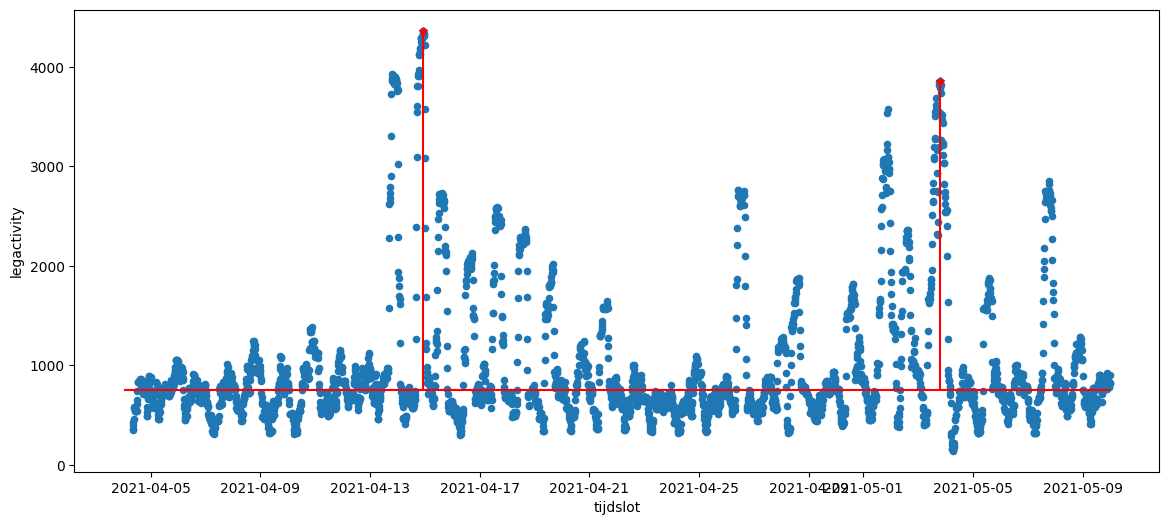


cow:  41
   median value:  778.0
   max value:  6788.0
   min peak:  6372.0
   peak values: [6788.0, 6372.0]
   in-between similar peaks: 0
   days between peaks: 22
   plot:


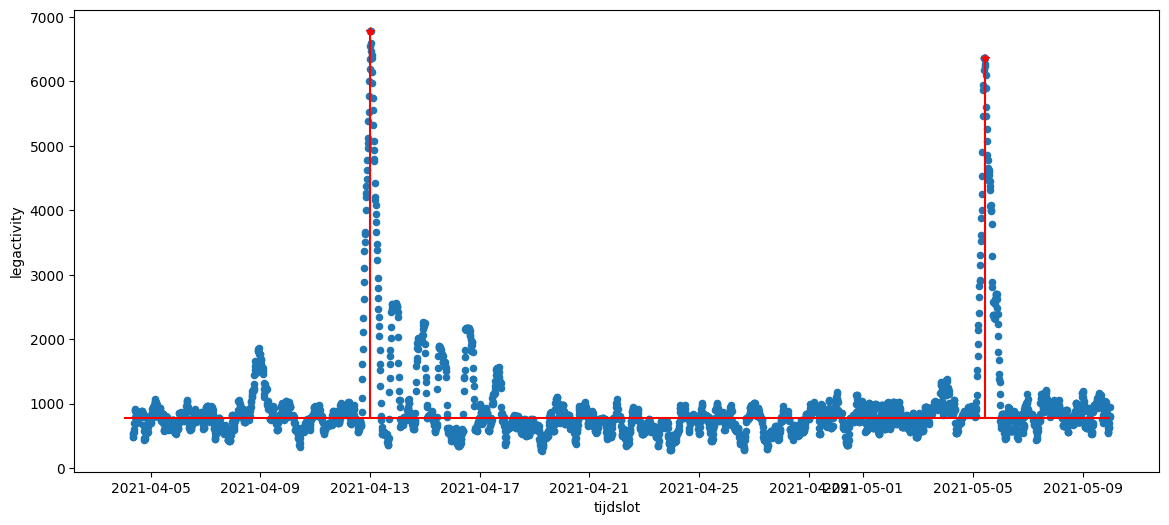


cow:  13
   median value:  1327.0
   max value:  7140.0
   min peak:  7106.0
   peak values: [7140.0, 7106.0]
   in-between similar peaks: 0
   days between peaks: 25
   plot:


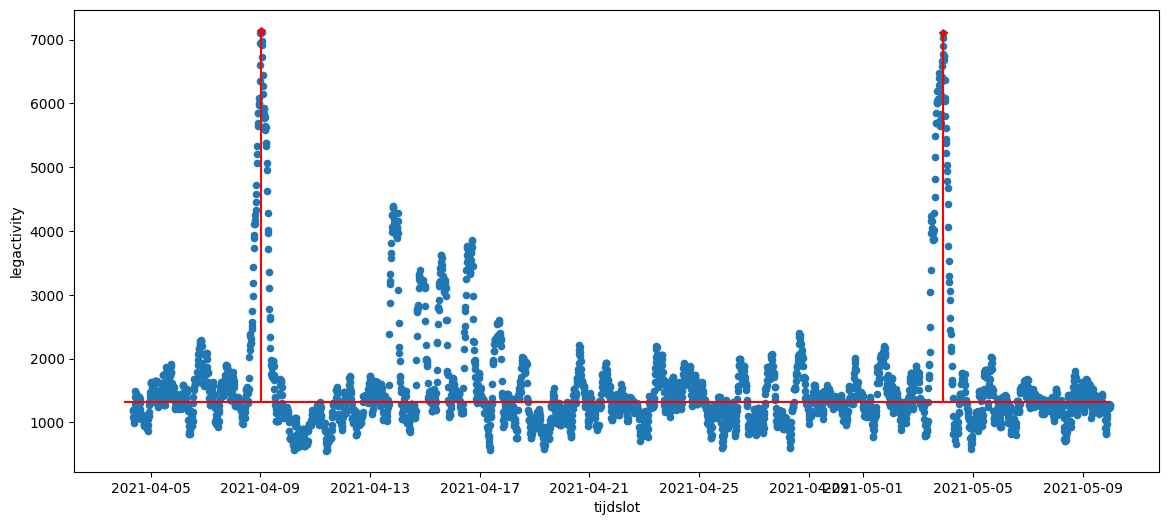


cow:  44
   median value:  1088.0
   max value:  10067.0
   min peak:  5416.0
   peak values: [5416.0, 10067.0]
   in-between similar peaks: 0
   days between peaks: 20
   plot:


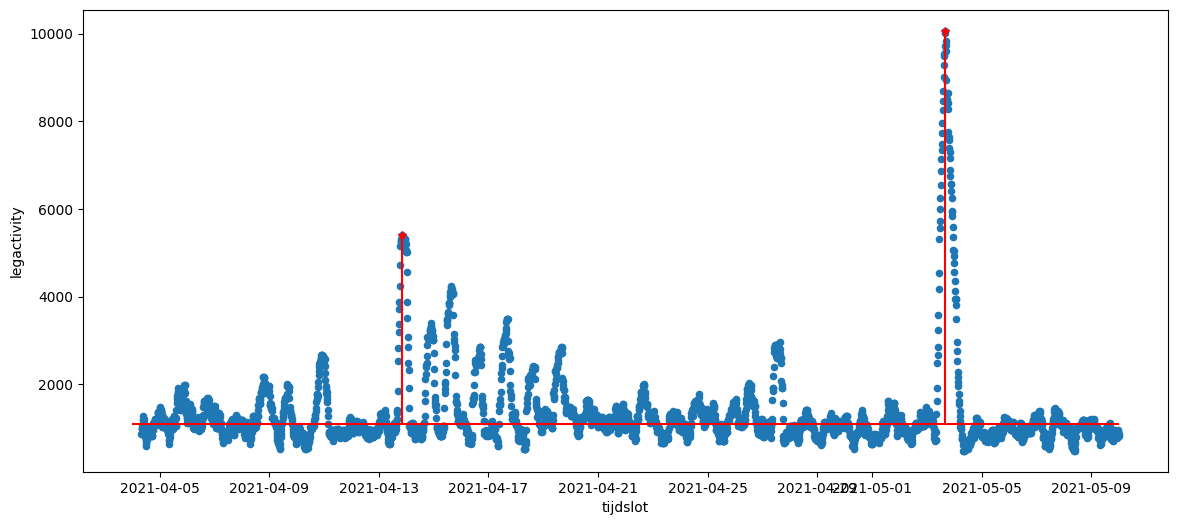


cow:  64
   median value:  1203.0
   max value:  9910.0
   min peak:  7158.0
   peak values: [7158.0, 9910.0]
   in-between similar peaks: 0
   days between peaks: 23
   plot:


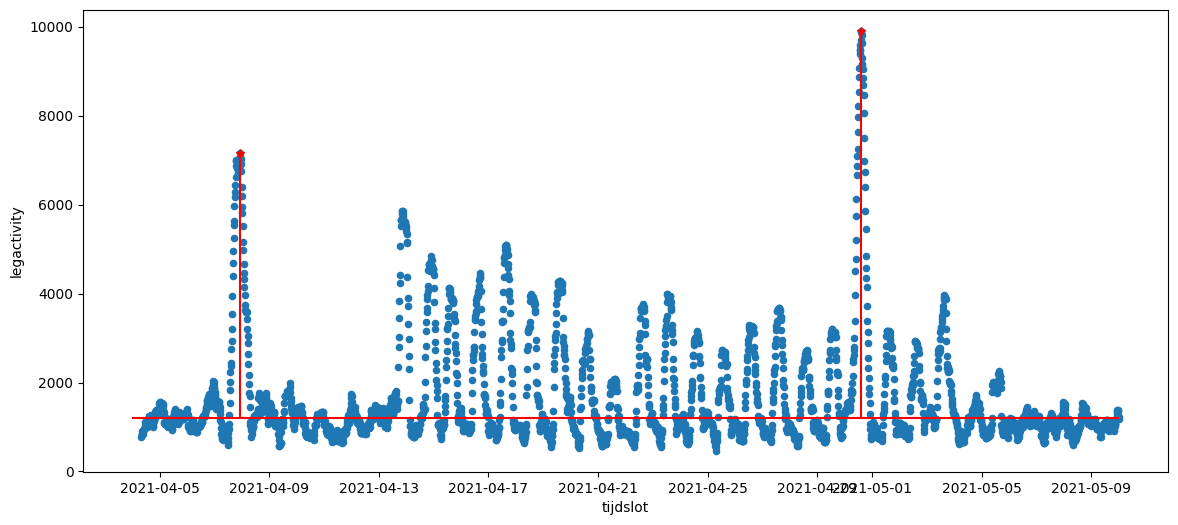


cow:  66
   median value:  1165.0
   max value:  9085.0
   min peak:  7242.0
   peak values: [7242.0, 9085.0]
   in-between similar peaks: 0
   days between peaks: 20
   plot:


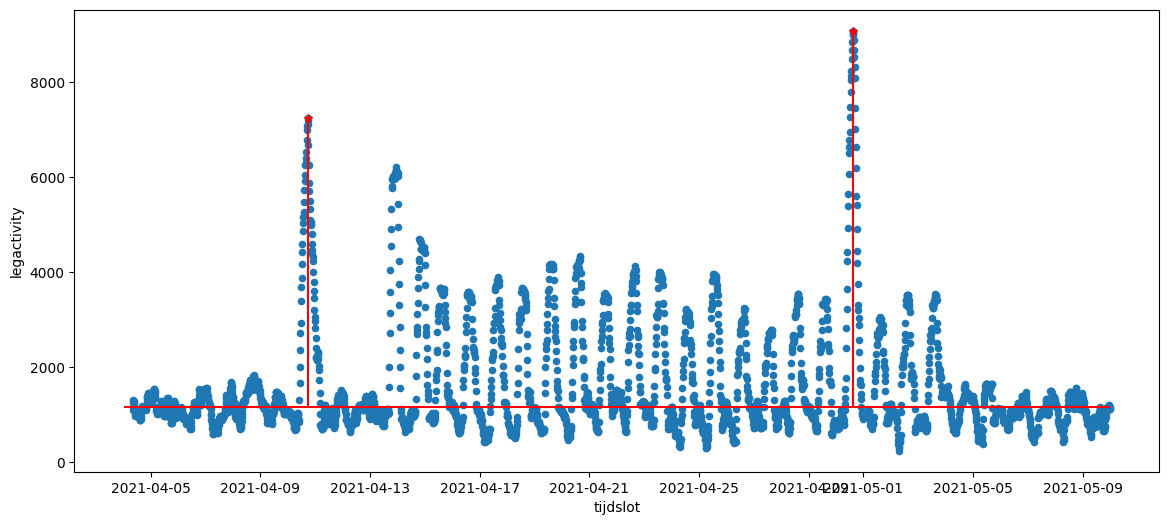


cow:  90
   median value:  1216.0
   max value:  6409.0
   min peak:  3715.0
   peak values: [3715.0, 6409.0]
   in-between similar peaks: 0
   days between peaks: 21
   plot:


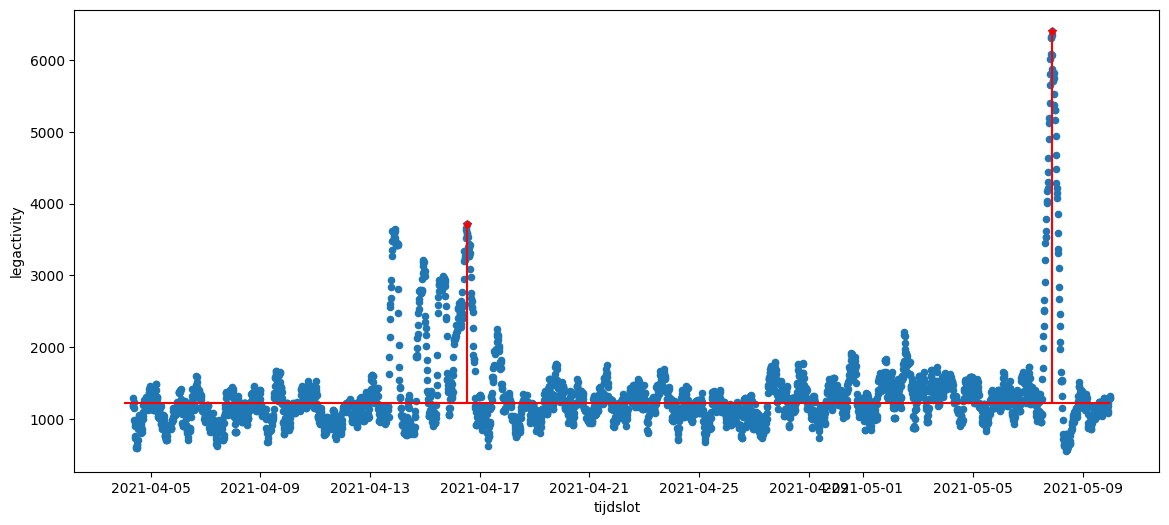


cow:  36
   median value:  1022.0
   max value:  8084.0
   min peak:  6558.0
   peak values: [6558.0, 8084.0]
   in-between similar peaks: 0
   days between peaks: 21
   plot:


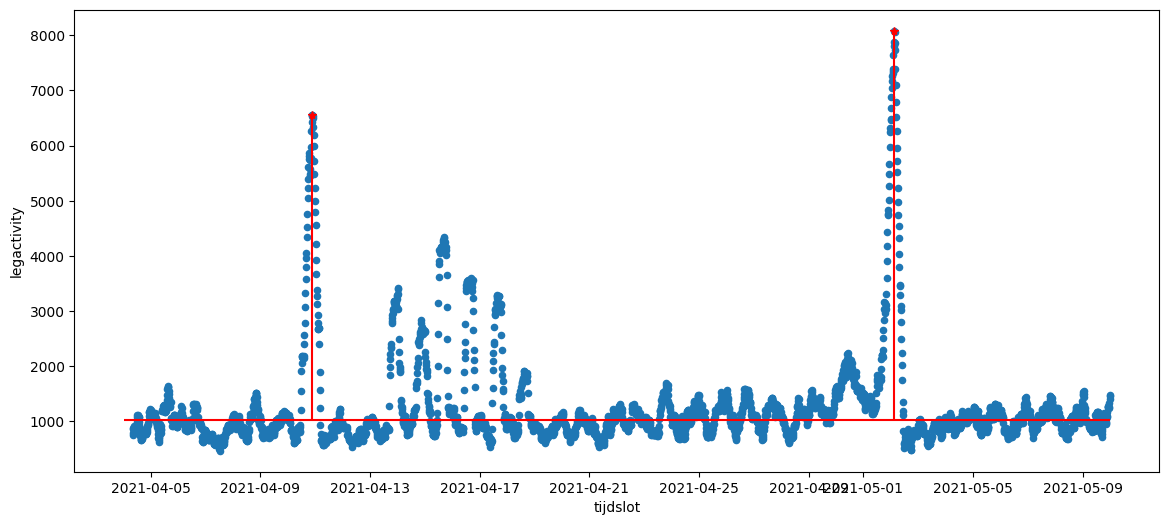


cow:  95
   median value:  1206.0
   max value:  10369.0
   min peak:  6229.0
   peak values: [6229.0, 10369.0]
   in-between similar peaks: 0
   days between peaks: 21
   plot:


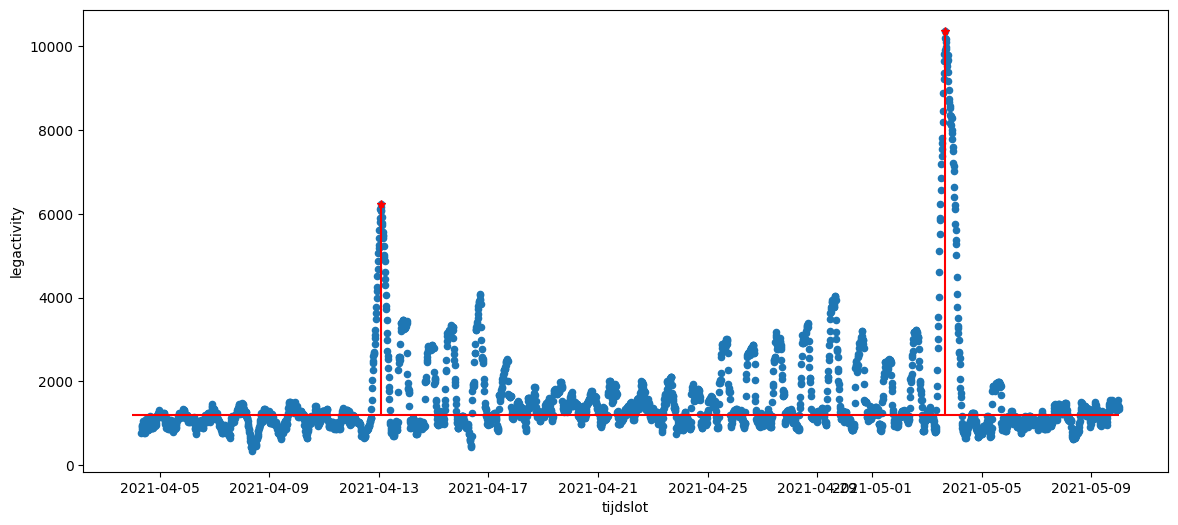


cow:  55
   median value:  1463.0
   max value:  10990.0
   min peak:  9260.0
   peak values: [10990.0, 9260.0]
   in-between similar peaks: 0
   days between peaks: 20
   plot:


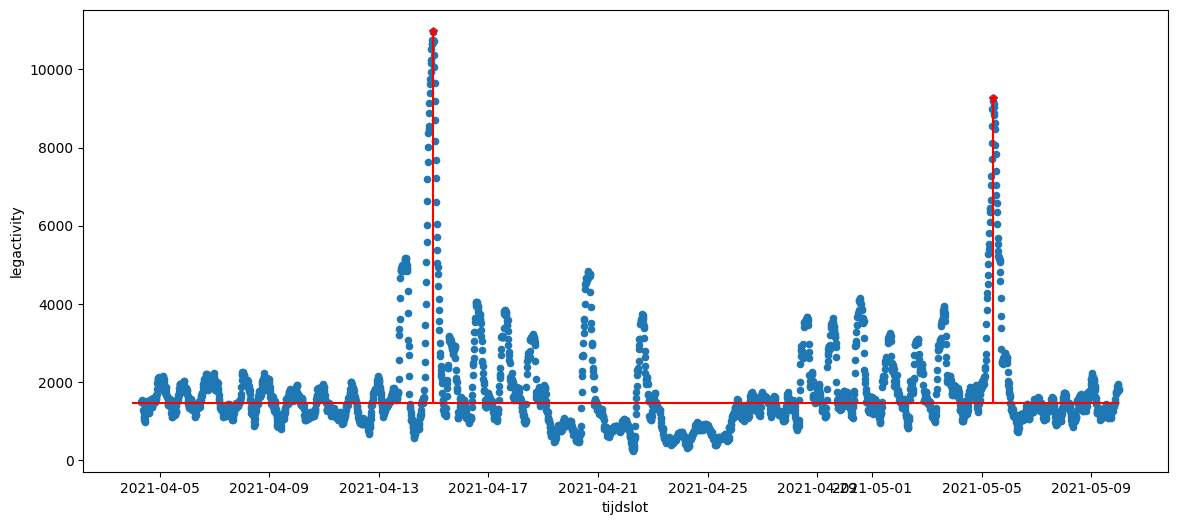

In [8]:
for koenummer in koenummers:
    
    # take a subset of the leg activity dataframe for the period over which we want to detect estrus
    subset = legactivity.loc[legactivity['koenummer'] == koenummer]
    subset = subset.loc[subset['tijdslot']>'2021-03-01 00:00:00']
    subset = subset.loc[subset['tijdslot']<'2021-06-01 00:00:00']
    subset.legactivity = subset.rolling(8 * 4).legactivity.sum() # 8 hours (8 * 4 x 15 minutes)
    
    # set some variables which will be convenient later
    first = np.nanmin(subset.tijdslot)
    last = np.nanmax(subset.tijdslot)
    max_legactivity = np.nanmax(subset.legactivity)
    median_legactivity = np.nanmedian(subset.legactivity)

    # find peaks that are at least 2.5 times the median in height and at least 16 days apart
    peak_indices, properties = find_peaks(subset.legactivity, distance = 4 * 24 * 16, height = median_legactivity * 2.5)
    peak_values = [0] * len(peak_indices)
    tijdslot_values = [0] * len(peak_indices)
    x = subset.tijdslot.tolist()
    y = subset.legactivity.tolist()
    for index, peak_index in enumerate(peak_indices):
        tijdslot_values[index] = x[peak_index]
        peak_values[index] = y[peak_index]
        
    # if we found 2 peaks for this cow...
    if len(peak_indices) == 2:
        
        # count in-between peaks of similar height (at least 0.9 times lowest peak), 12 hours from both peaks
        peak_min = np.nanmin(peak_values) 
        days_between = round((peak_indices[1] - peak_indices[0]) / (4 * 24))
        in_between_count = 0
        for index in range(peak_indices[0] + 4 * 12, peak_indices[1] - 4 * 12):
            if y[index] >= peak_min * 0.9:
                in_between_count = in_between_count + 1

        # show plots for this case if 7 or less in-between peaks of similar height were found
        if in_between_count <= 7:
            print('cow: ', koenummer)
            print('   median value: ', np.nanmedian(subset.legactivity))
            print('   max value: ', np.nanmax(subset.legactivity))
            print('   min peak: ', peak_min)
            print('   peak values:', peak_values)
            print('   in-between similar peaks:', in_between_count)
            print('   days between peaks:', days_between)
            print('   plot:')
            figure = subset.plot(x ='tijdslot', y='legactivity', kind = 'scatter', figsize=(14,6))
            figure.plot(tijdslot_values, peak_values, "*", color="red")
            figure.vlines(tijdslot_values, ymin = median_legactivity, ymax = peak_values, color = "red") # vertical red line: distance to median at each peak
            figure.hlines(y = median_legactivity, xmin = first, xmax = last, color = "red") # horizontal red line: median
            plt.show()
            print()

#### Excercise 2: Find potential health problems with activity data. 
Can you tweak the code from the previous excercise to find cows that mat have a health issue? For example, you could look for cows that have negative peaks in activity. 

_Task:_ Produce code that generates a list of cows that show behaviour that may indicate a health problem. (Array with koenummer values)

_Extra:_ Plot a few of these cows with potential health problems.